In [24]:
import numpy as np
with open('./input/3.txt', 'r') as file:
    wires = [l.strip() for l in file.readlines()][0:2]

In [186]:
def compute_points(wire):
    coords = [0,0]
    xy = np.array([[0,0]])
    for ins in wire:
        x, y = coords
        xn, yn = coords
        task = ins[0]
        length = int(ins[1:])
        
        if task == 'U':
            yn = y + length
            y += 1
        elif task == 'R':
            xn = x + length
            x += 1
        elif task == 'D':
            yn = y - length
            y -= 1
        else:
            xn = x - length
            x -= 1
            
        xyt = np.array([np.linspace(x, xn, length), np.linspace(y, yn, length)]).T
        xy = np.append(xy, xyt, axis=0)
        coords = [xn, yn]
    
    return xy

In [187]:
wire1 = wires[0].split(',')
wire2 = wires[1].split(',')

xy1 = compute_points(wire1)
xy2 = compute_points(wire2)


print(xy1.shape, xy2.shape)

(147388, 2) (154437, 2)


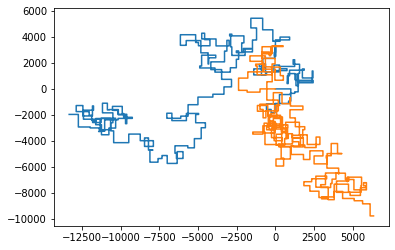

In [188]:
import matplotlib.pyplot as plt
plt.plot(xy1[:,0], xy1[:,1])
plt.plot(xy2[:,0], xy2[:,1])
plt.show()

In [189]:
intersections = np.array([x for x in set(tuple(x) for x in xy1) & set(tuple(x) for x in xy2)])

In [190]:
from scipy.spatial.distance import cdist
mindist = 10000000

dists = cdist(intersections, np.zeros(intersections.shape), metric='cityblock')

for i, c in enumerate(dists[:,0]):
    out = np.abs(c)
    if out < mindist:
        mindist = out
        print(mindist)
        print(i)

2998.0
0
2331.0
1
1771.0
4
1340.0
6
1314.0
12
865.0
24
0.0
30


In [191]:
def count_steps(coords, ins):
    counts = []
    print(ins)
    for i in ins:
        count = 0
        for c in coords:
            if (c == i).all():
                counts.append(count)
                break
            
            count += 1
        
    return counts

In [194]:
print(xy1[0:1003])

[[   0.    0.]
 [   1.    0.]
 [   2.    0.]
 ...
 [1000.    0.]
 [1000.   -1.]
 [1000.   -2.]]


In [192]:
countsA = count_steps(xy1, intersections)
print('-------')
countsB = count_steps(xy2, intersections)

[[ -644.  2354.]
 [ -632.  1699.]
 [ -811.  1903.]
 [ -817.  1592.]
 [  -91.  1680.]
 [ -817.  1923.]
 [  -30.  1310.]
 [ -817.  1888.]
 [    6.  3264.]
 [ -632.  1087.]
 [  -20. -1691.]
 [ -574. -1277.]
 [  192. -1122.]
 [    0.  1411.]
 [ -899.  1903.]
 [ -780.  1691.]
 [ -780.  1592.]
 [ -644.  1923.]
 [    6.  3317.]
 [ -632.  1309.]
 [  -30.  1411.]
 [ -632.  1521.]
 [ -491. -1583.]
 [ -211.  1310.]
 [  431.  -434.]
 [ -129. -1149.]
 [  -48. -1831.]
 [ -574. -1177.]
 [ -817.  1691.]
 [ -898.  1313.]
 [    0.     0.]
 [  321.  1411.]
 [  431. -1122.]
 [ -204.  1310.]
 [  -26.  3317.]
 [  321.  1553.]
 [   29.  3264.]
 [-1176.  1544.]
 [-1397.  1313.]
 [  938.  -940.]
 [ -811.  2353.]
 [  192. -1149.]
 [ -273. -1691.]
 [    0.  1310.]
 [ -811.  1969.]
 [ -570.  1309.]
 [ -780.  1923.]
 [  266.  1680.]
 [  287.  1680.]
 [   29.  3317.]
 [  -26.  3264.]
 [  -20. -1275.]
 [  976.  -940.]
 [ -745.  1691.]
 [ -745.  1592.]]
-------
[[ -644.  2354.]
 [ -632.  1699.]
 [ -811.  1903.]
 [ -8

In [195]:
npA = np.array(countsA)
npB = np.array(countsB)
print(npA, npB)
s = np.sum([npA, npB], axis=0)
p = np.sort(s)
p

[34606 32719 33988 29729 26715 33128 28054 33967 38012 32107  3711  4959
  2930 26355 33230 30103 29766 32955 38065 32329 26385 32541  4570 28235
  6807  5532  3879  5059 30140 29369     0 26034  2691 28228 36187 25026
 36347 30646 31098  2002 34438  5853  4244 28024 34054 28595 33091 27388
 24865 36294 36134  3295  1964 30068 29801] [ 8998  9665 14886  6029 10225  6360 13034  6325 24730 16809 33085 82649
 32304 13379 14974 27817 27916  9429 23681 14113 13135 28135 82260 17453
 38103 36542 79227 36069  6128  5669     0 10906 38791 28774 23649 10764
 24707 15808  5170 39514 19480 32331 33338 13480 27508 14051 27585 10582
 10603 23704 24762 79811 40094 14608 14509]


array([    0, 35038, 35234, 35468, 35758, 35790, 36268, 36268, 36796,
       36940, 36940, 37582, 37970, 38184, 39488, 39520, 39734, 40292,
       41088, 41128, 41482, 41504, 41516, 42058, 42074, 42384, 42384,
       42646, 43604, 44310, 44676, 44910, 45688, 46442, 46454, 48204,
       48874, 48916, 53918, 57002, 57682, 57920, 59836, 59998, 60676,
       60676, 60896, 61054, 61562, 61746, 62742, 83106, 83106, 86830,
       87608])

In [175]:
minsu = 1000000000
for i, v in enumerate(npA):
    su = v + npB[i]
    
    if su < minsu:
        minsu = su
        print(su)

43697
42471
35833
35303
35111
0
